#### Load momemta results

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

momemta_out = np.loadtxt('weights_clean.csv', delimiter=",")
benchmarks = momemta_out[0,:]
n_benchmarks = benchmarks.shape[0]
momemta_weights = momemta_out[1:,:]
n_events = momemta_weights.shape[0]
expected_benchmark_idx = 12
top_width = 1.5
print 'expected benchmark: {}'.format(benchmarks[expected_benchmark_idx])
print benchmarks.shape, momemta_weights.shape

expected benchmark: 172.0
(26,) (100, 26)


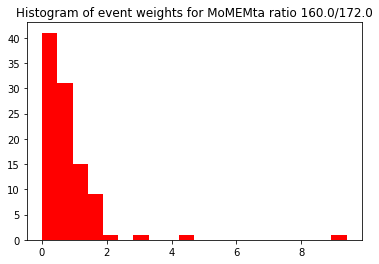

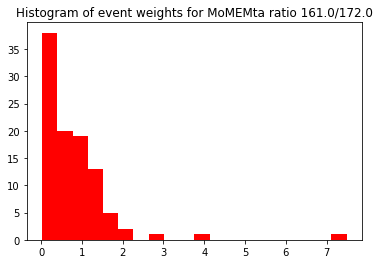

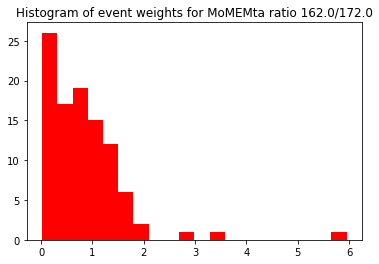

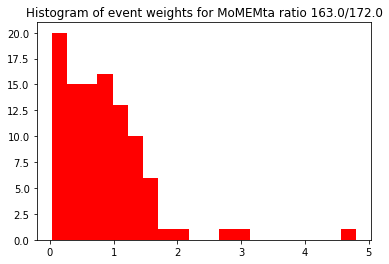

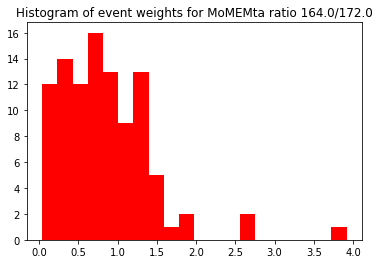

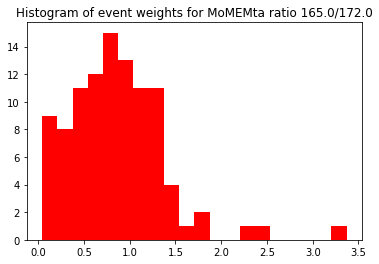

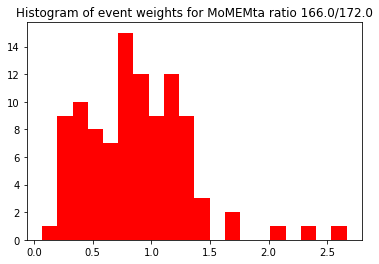

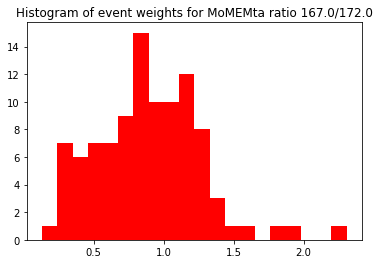

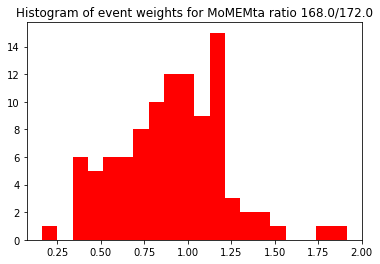

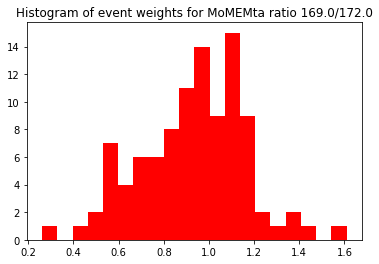

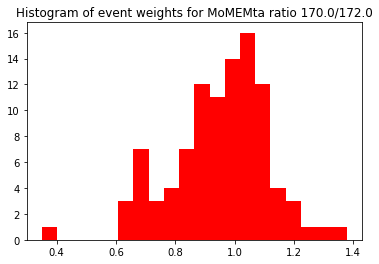

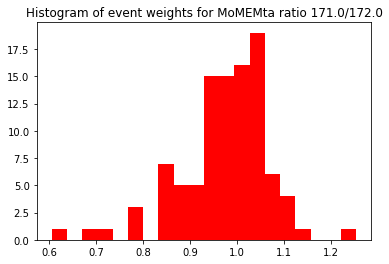

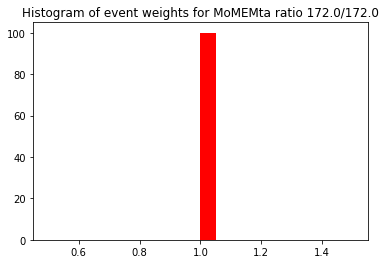

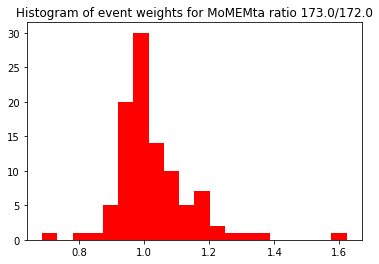

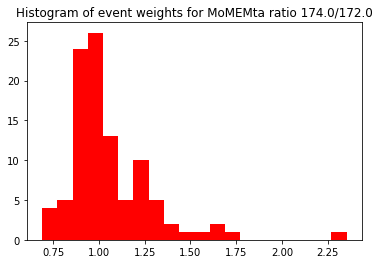

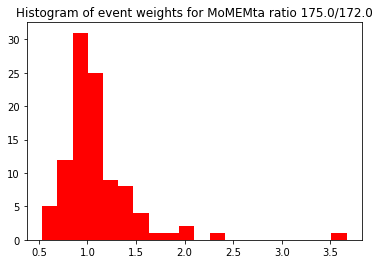

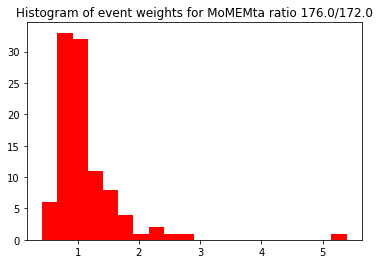

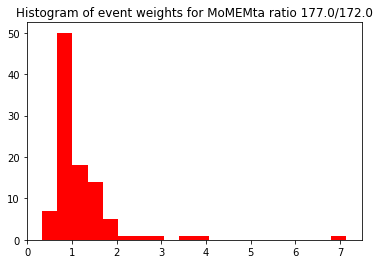

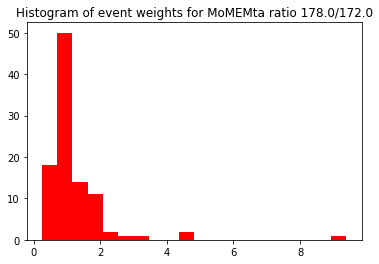

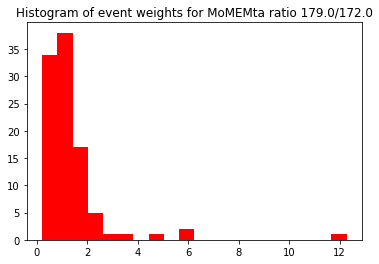

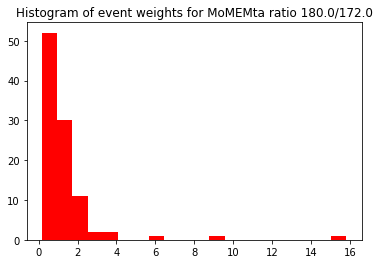

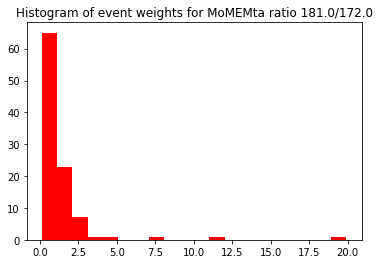

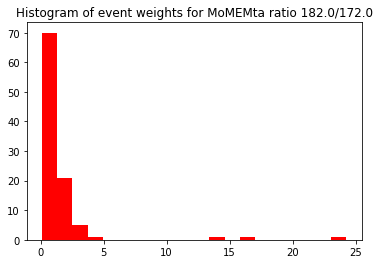

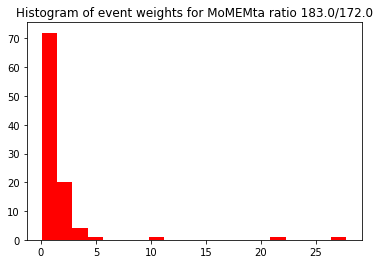

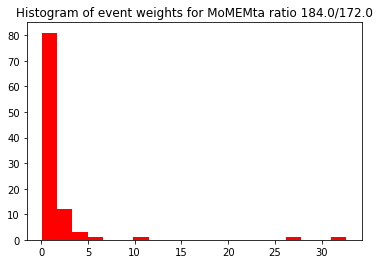

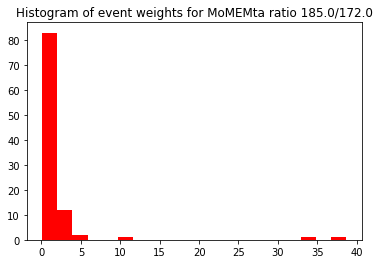

In [2]:
momemta_ratios = []
for event_weights in momemta_weights:
    momemta_ratios.append(event_weights/event_weights[expected_benchmark_idx])
momemta_ratios = np.array(momemta_ratios)

for idx, benchmark in enumerate(benchmarks):
    plt.hist(momemta_ratios[:,idx],bins=20, color='red')
    plt.title('Histogram of event weights for MoMEMta ratio {}/{}'.format(benchmarks[idx], benchmarks[expected_benchmark_idx]))
    plt.show()

In [3]:
momemta_log_sq_ratios = []
momemta_log_ratios = []
for ratio in momemta_ratios:
    momemta_log_ratios.append(np.log(ratio))
    momemta_log_sq_ratios.append(-2 * np.log(ratio))
    
momemta_log_ratios = np.array(momemta_log_ratios)
momemta_log_sq_ratios = np.array(momemta_log_sq_ratios)

print momemta_log_sq_ratios[0][0], momemta_log_sq_ratios[0][expected_benchmark_idx], momemta_log_sq_ratios[0][-1]

7.4984079383661495 -0.0 -1.8779358774158508


In [4]:
momemta_sum_log_sq_ratios = np.sum(momemta_log_sq_ratios, axis=0)
print momemta_sum_log_sq_ratios

[171.52736544 144.35669486 124.97911054 104.19742593  86.65256739
  70.94420884  57.35165092  43.48830134  32.45715576  21.90047178
  13.01015136   6.32399762   0.          -4.42606707  -7.31813884
  -9.30055236 -10.28126222 -11.09377163  -9.96609062 -12.64497523
  -6.61436256  -3.56208402  -0.26053997   5.13329501  11.384209
  17.99158785]


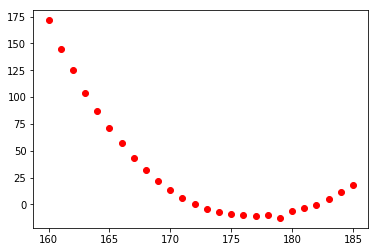

In [5]:
plt.plot(benchmarks, momemta_sum_log_sq_ratios, 'o', color='red');

#### Load madminer model and extract event-level ratios

In [6]:
from madminer.ml import ParameterizedRatioEstimator

In [7]:
forge = ParameterizedRatioEstimator(n_hidden=(100, 100))
forge.load('/home/zbhatti/codebase/madminer/momemta/inputs/alice')
theta0 = np.vstack( (np.linspace(benchmarks[0], benchmarks[-1], n_benchmarks), top_width*np.ones(n_benchmarks)) ).T
x = np.load('/home/zbhatti/codebase/madminer/momemta/inputs/x_test.npy')[:n_events,:]
log_ratios_T, _0 = forge.evaluate_log_likelihood_ratio(x=x, theta=theta0, test_all_combinations=True, run_on_gpu=False)
n_observables = x.shape[1]
print theta0.shape, x.shape, log_ratios_T.shape

(26, 2) (100, 23) (26, 100)


[ 51.614502   41.45933    31.71424    22.423893   13.656873    5.4982944
  -1.9651179  -8.65712   -14.515765  -19.491592  -23.547255  -26.659433
 -28.82109   -30.041786  -30.345657  -29.76722   -28.346294  -26.124514
 -23.144512  -19.451181  -15.093191  -10.123635   -4.5996213   1.4188795
   7.8705497  14.694495 ]


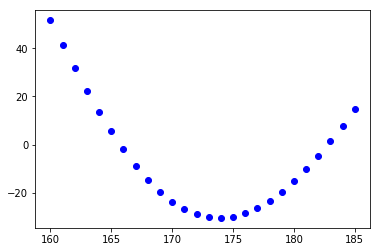

In [8]:
madminer_log_ratios = log_ratios_T.T
madminer_log_sq_ratios = -2*madminer_log_ratios
madminer_sum_log_sq_ratios = np.sum(-2*madminer_log_ratios, axis=0)
print madminer_sum_log_sq_ratios
plt.plot(benchmarks, madminer_sum_log_sq_ratios, 'o', color='blue')


In [9]:
madminer_log_ratios.shape, momemta_log_ratios.shape

((100, 26), (100, 26))

# Comparing madminer with MoMEMta

### compare all events with all bechmarks

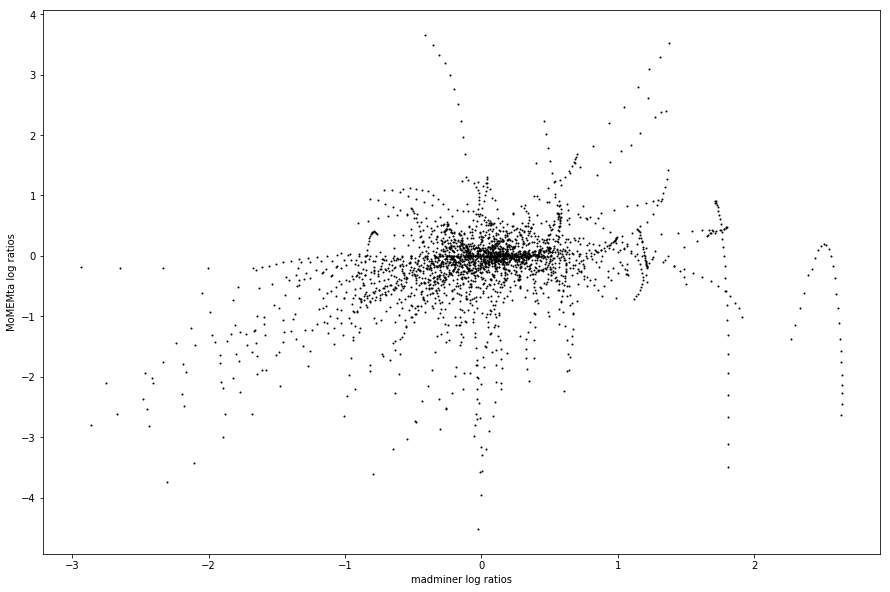

In [10]:
plt.figure(figsize=(15,10))
plt.scatter(madminer_log_ratios, momemta_log_ratios, marker='o', color='black', s=1);
plt.xlabel('madminer log ratios')
plt.ylabel('MoMEMta log ratios')
plt.show()

### compare each event for all benchmarks

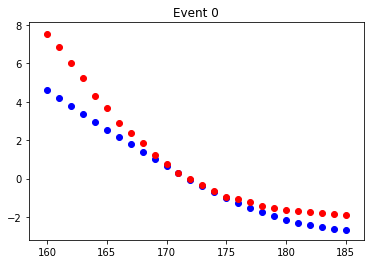

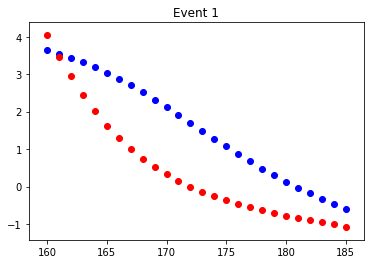

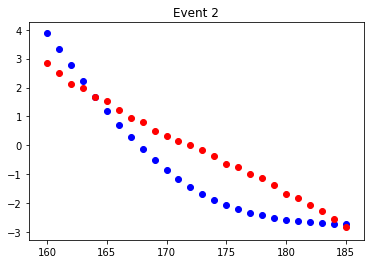

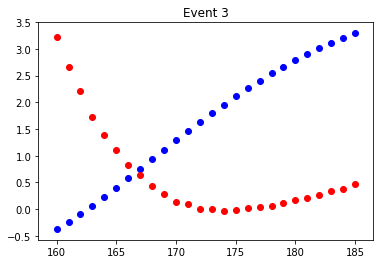

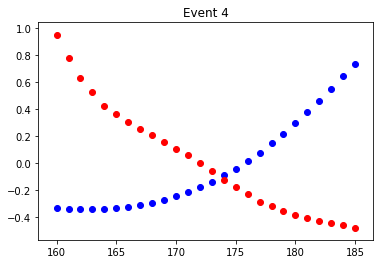

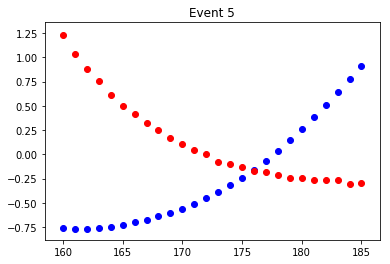

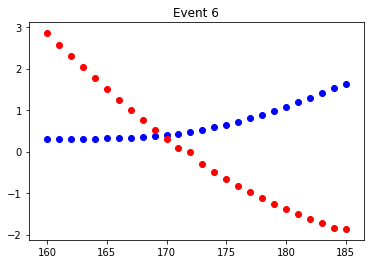

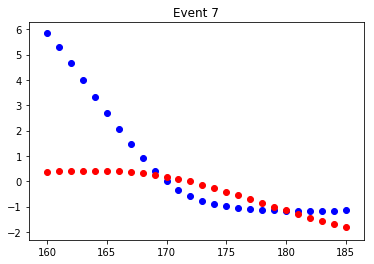

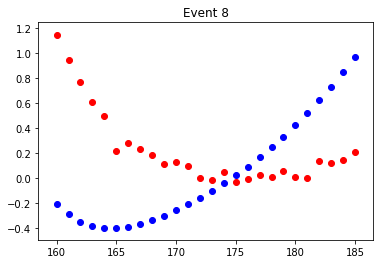

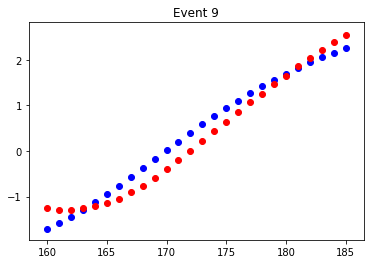

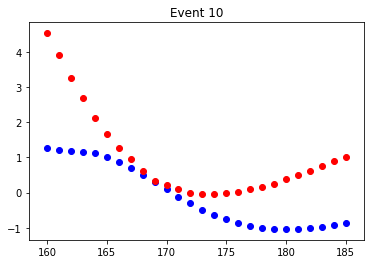

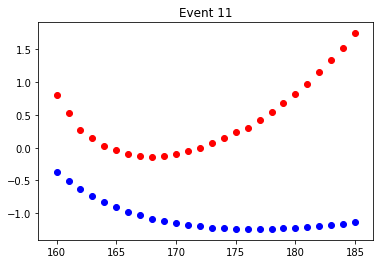

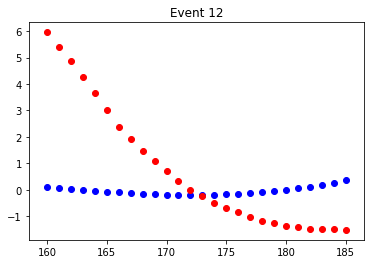

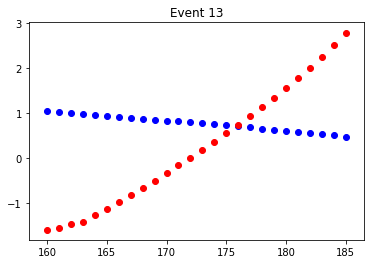

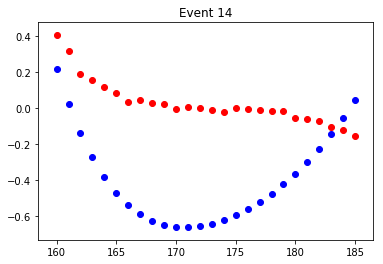

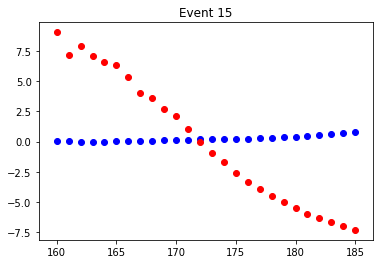

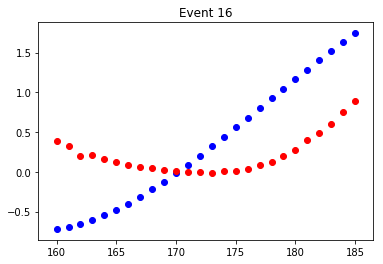

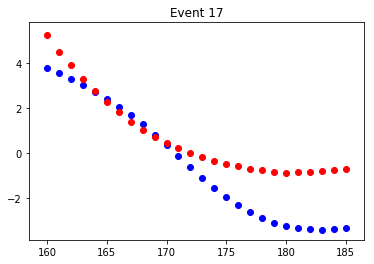

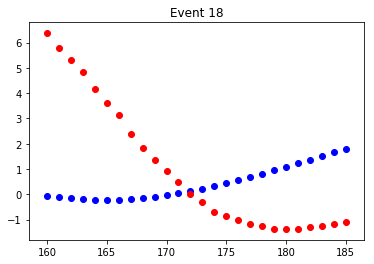

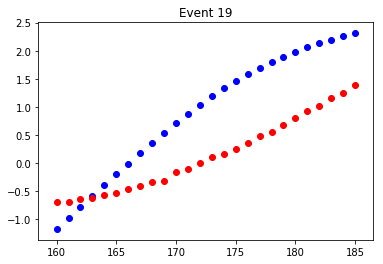

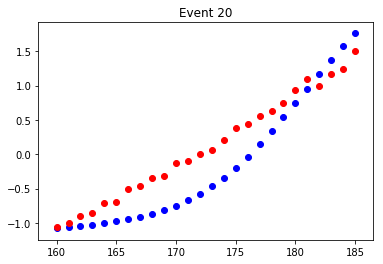

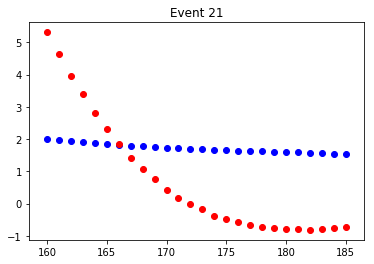

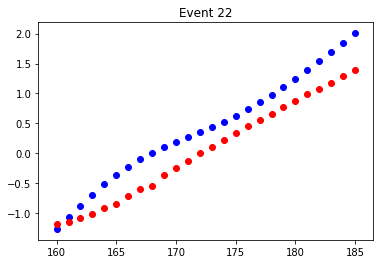

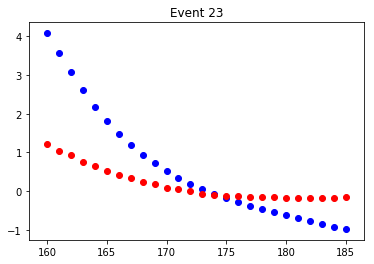

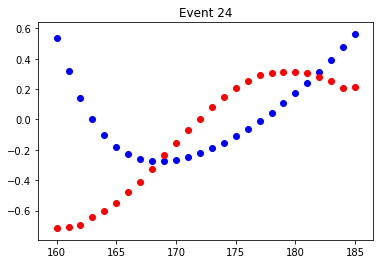

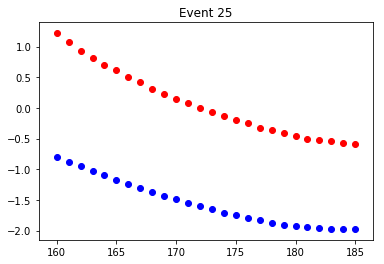

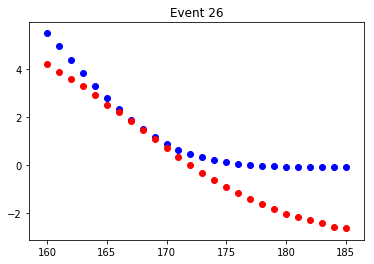

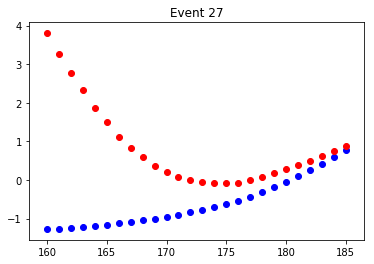

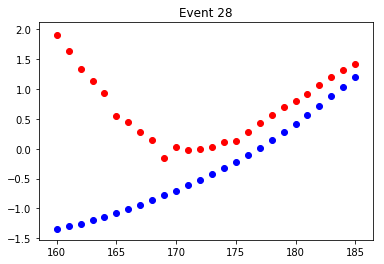

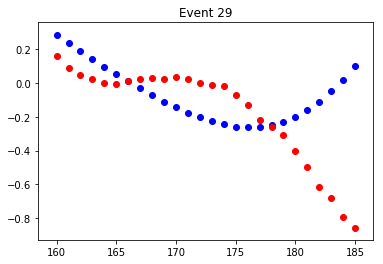

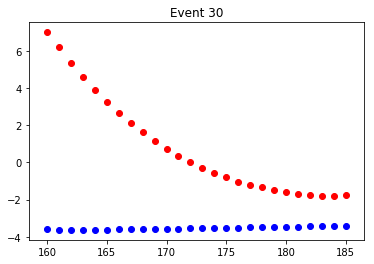

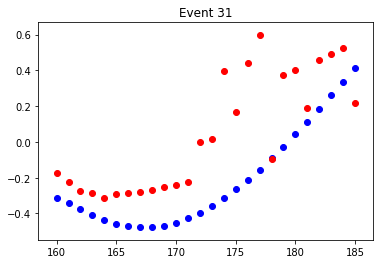

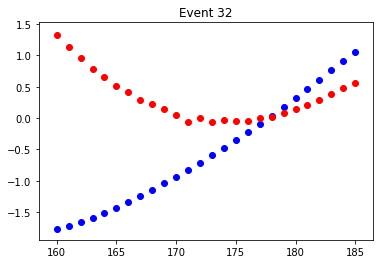

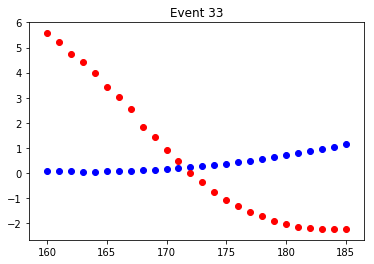

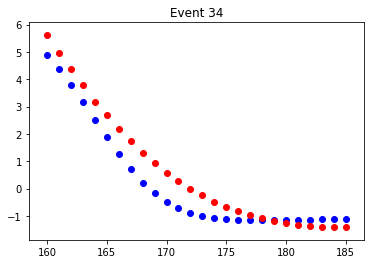

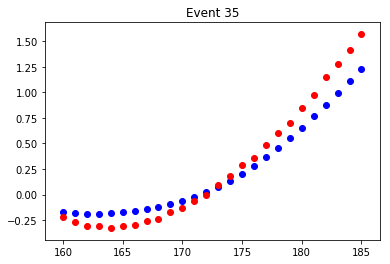

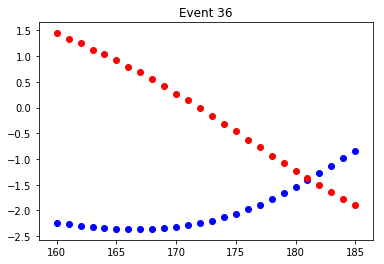

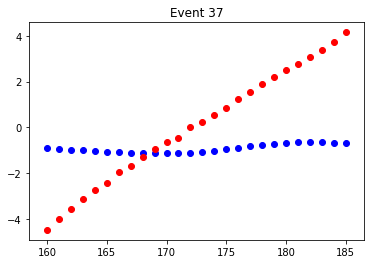

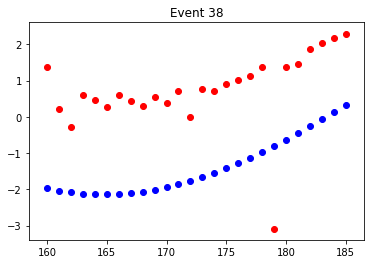

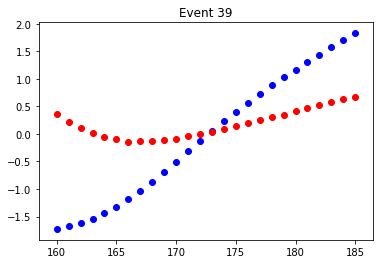

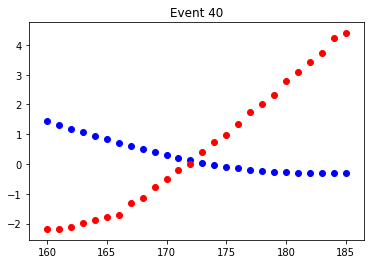

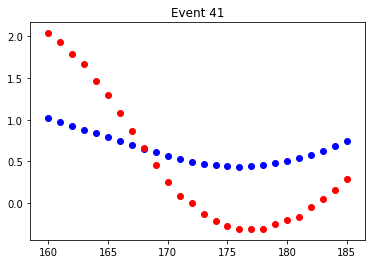

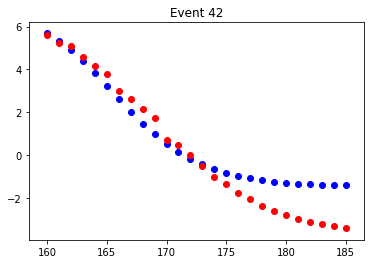

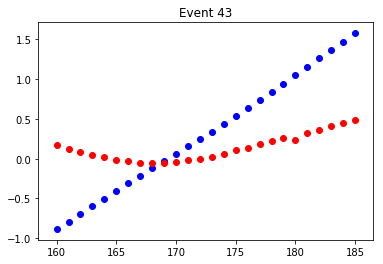

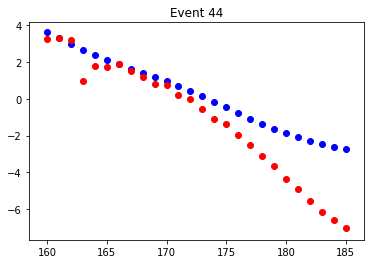

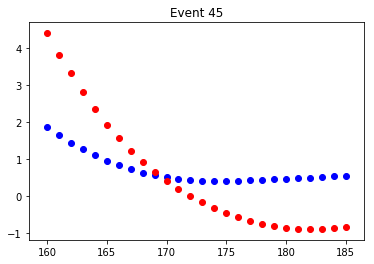

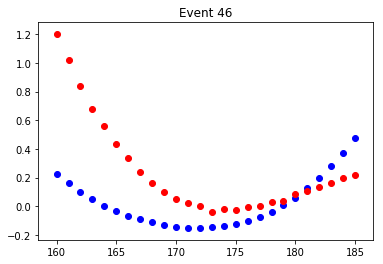

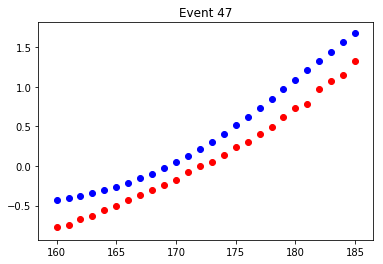

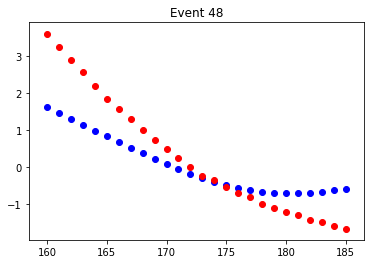

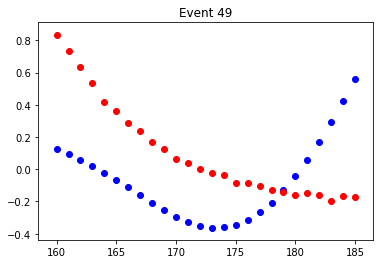

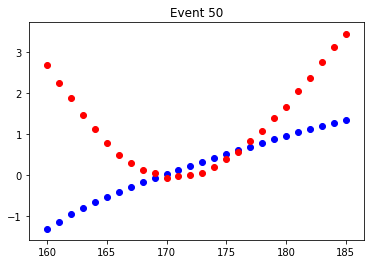

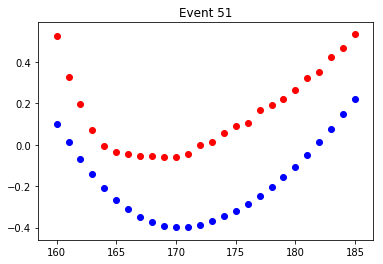

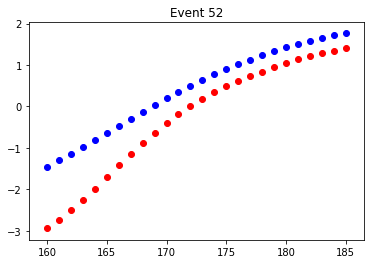

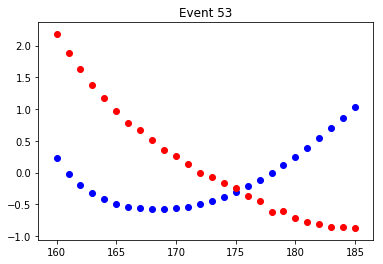

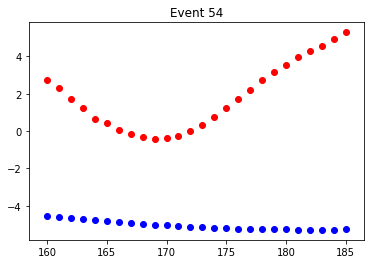

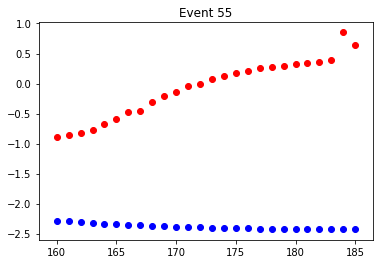

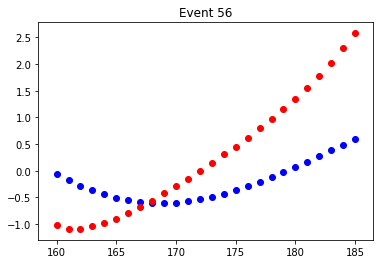

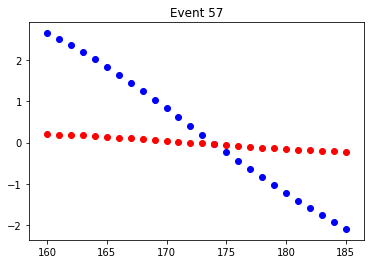

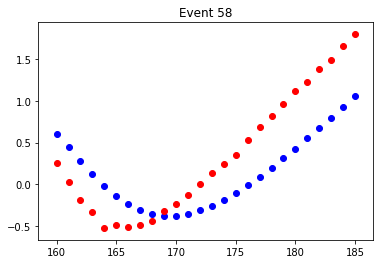

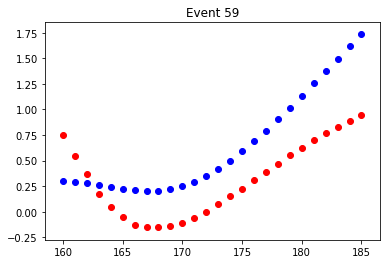

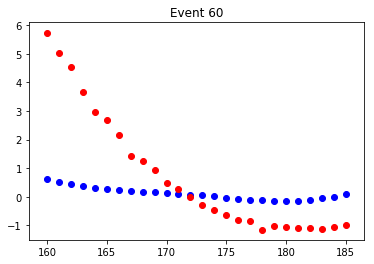

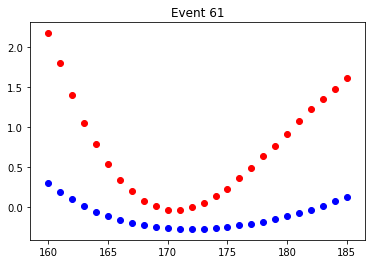

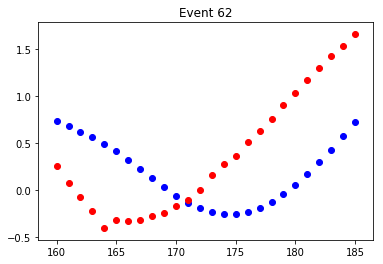

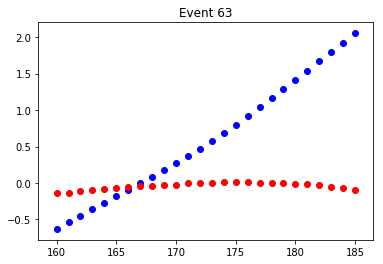

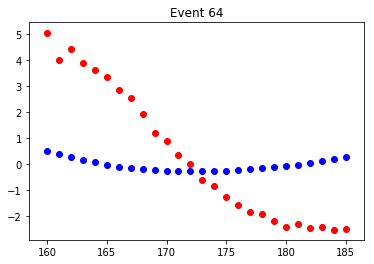

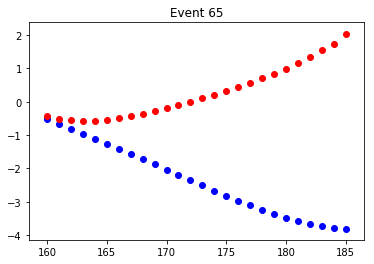

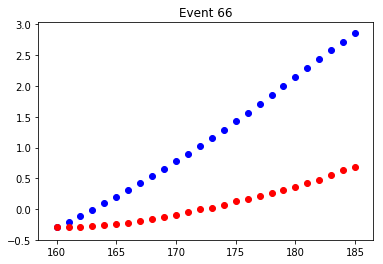

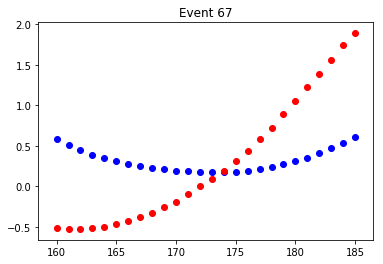

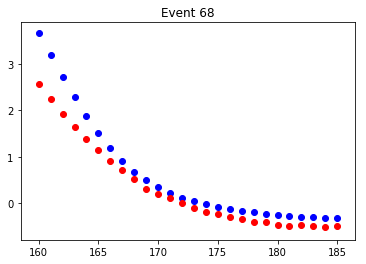

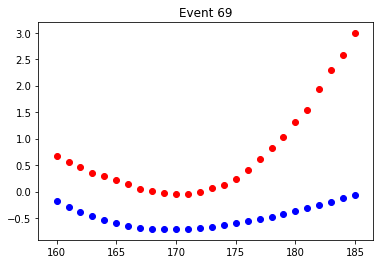

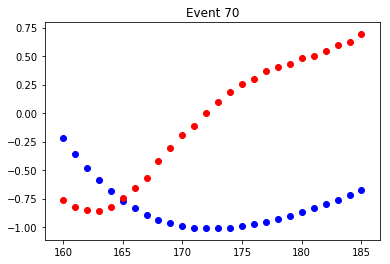

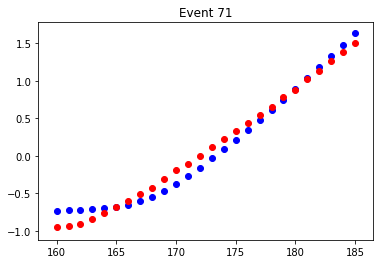

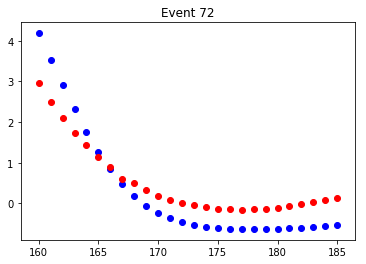

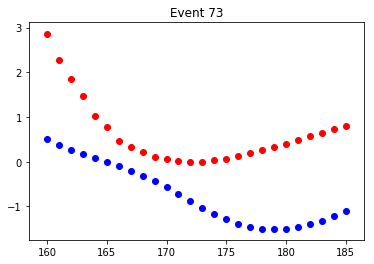

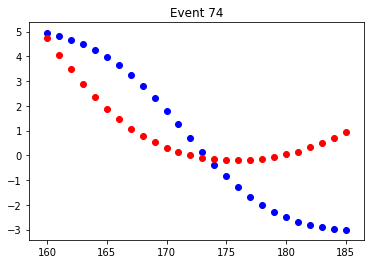

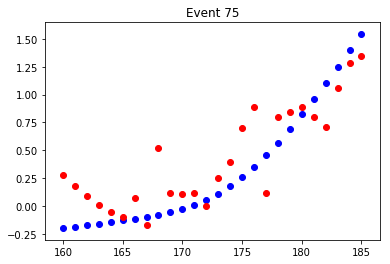

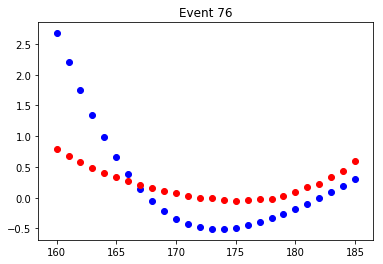

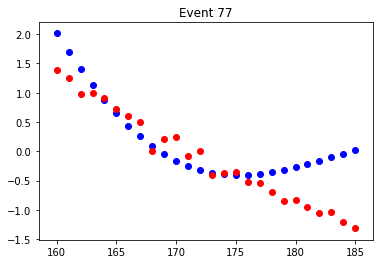

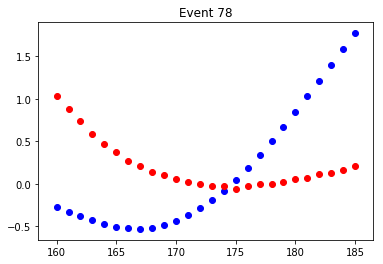

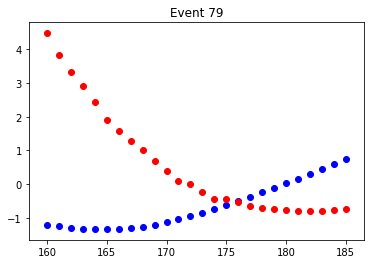

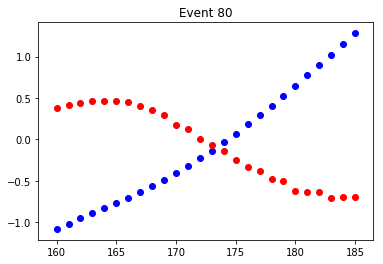

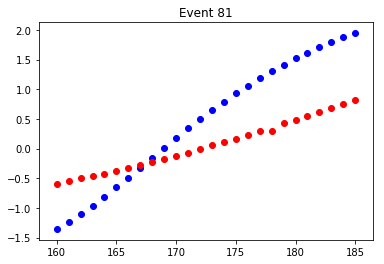

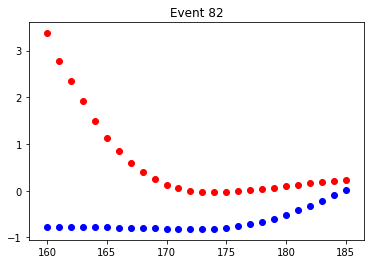

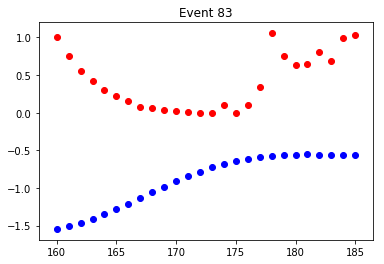

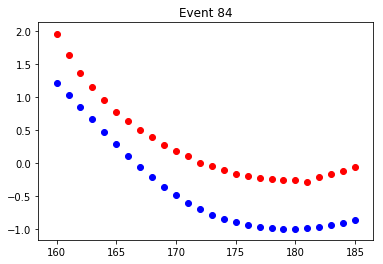

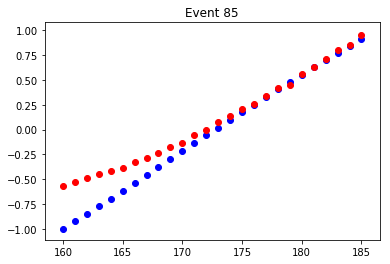

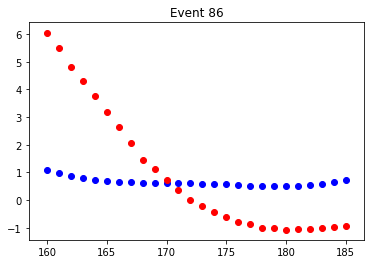

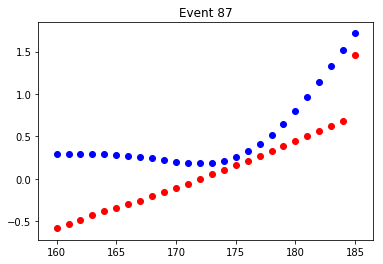

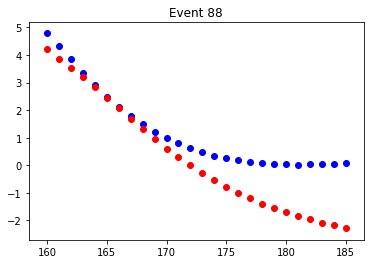

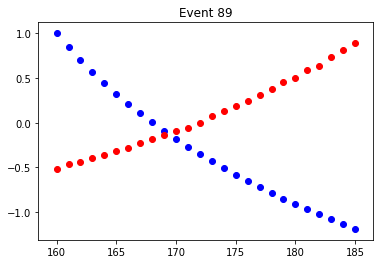

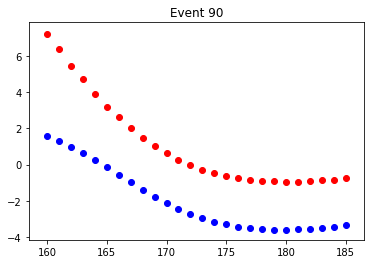

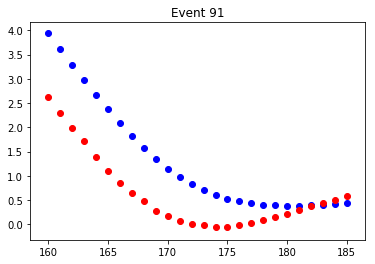

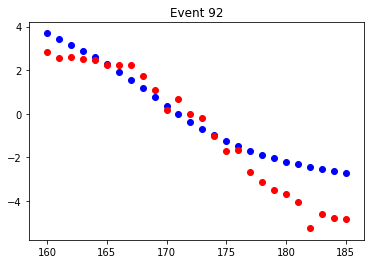

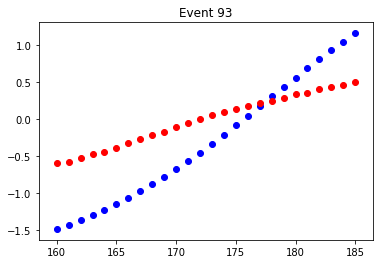

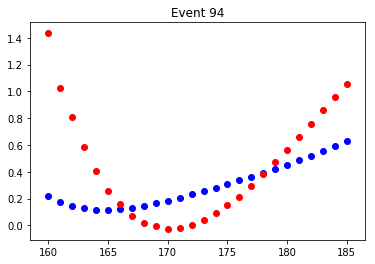

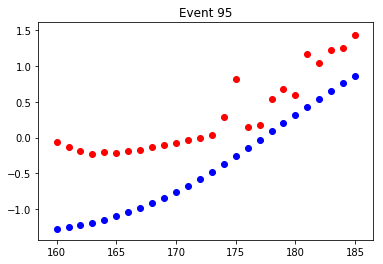

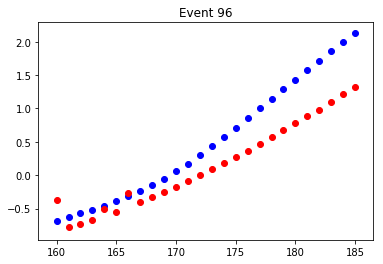

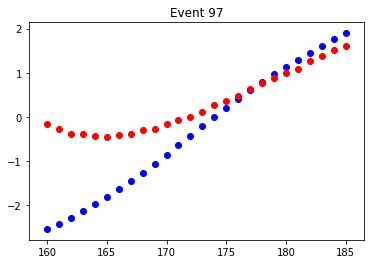

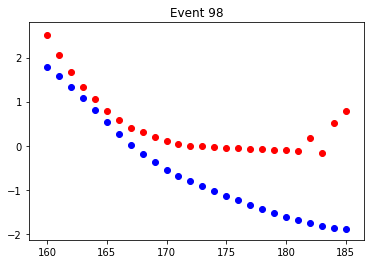

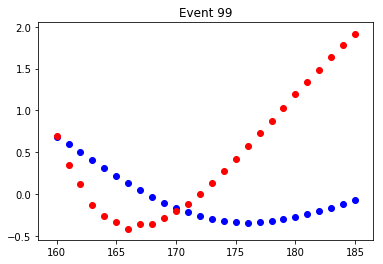

In [11]:
for i in range(0, n_events):
    plt.scatter(benchmarks, madminer_log_sq_ratios[i], marker='o', color='blue')
    # plt.scatter(benchmarks, momemta_log_sq_ratios[i], marker='o', color='red')
    plt.scatter(benchmarks, momemta_log_sq_ratios[i] - momemta_log_sq_ratios[i, expected_benchmark_idx], marker='o', color='red')
    plt.title('Event {}'.format(i))
    plt.show()

### compare all events for each bechmark

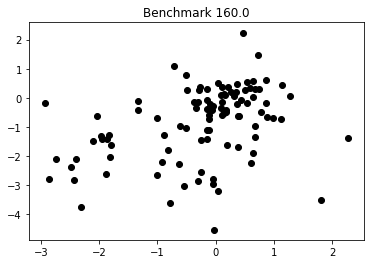

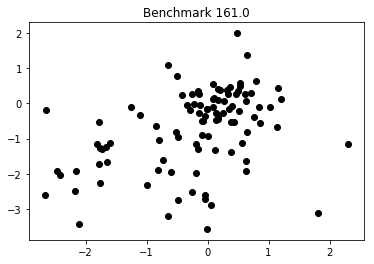

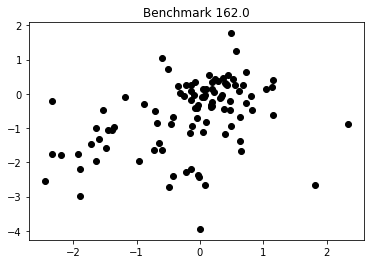

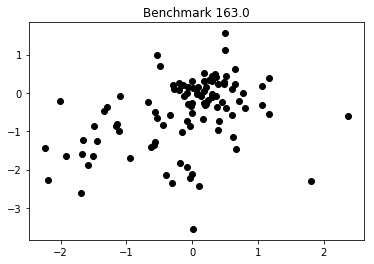

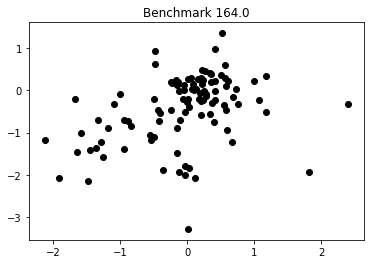

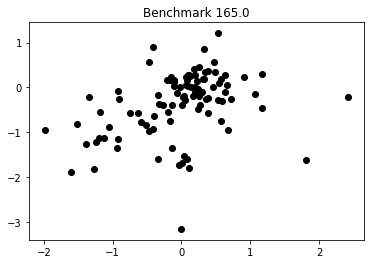

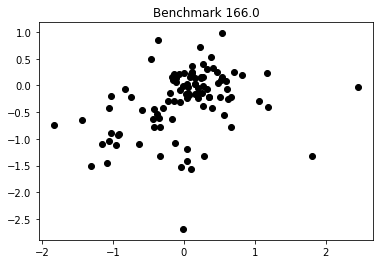

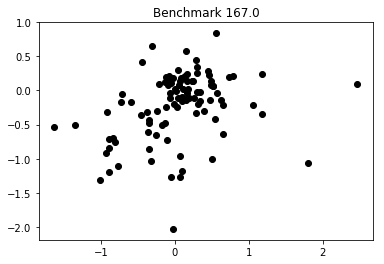

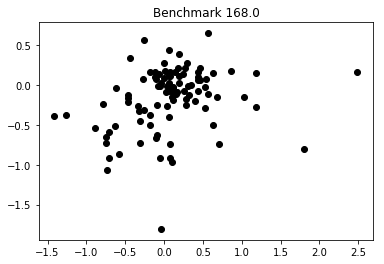

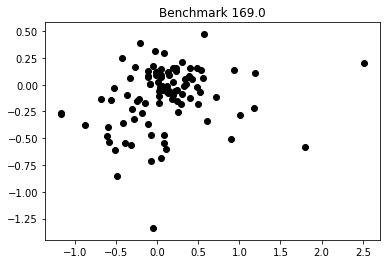

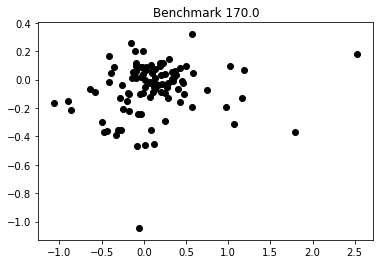

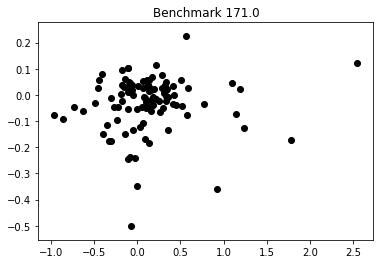

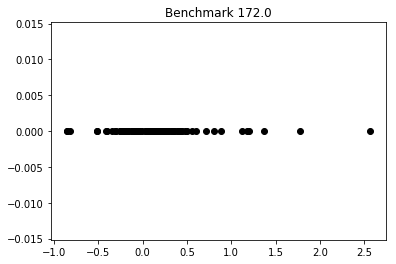

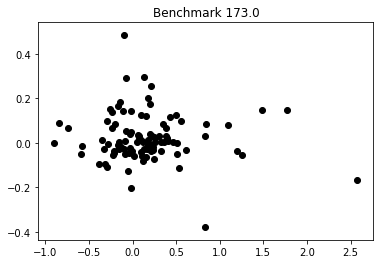

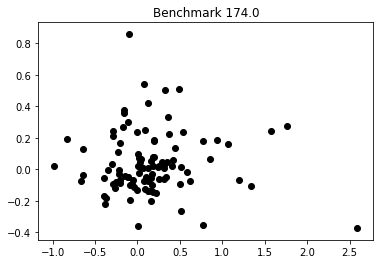

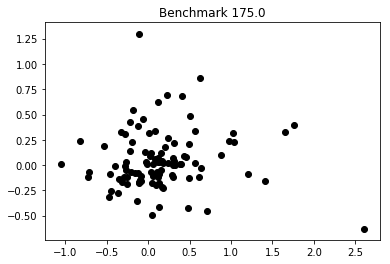

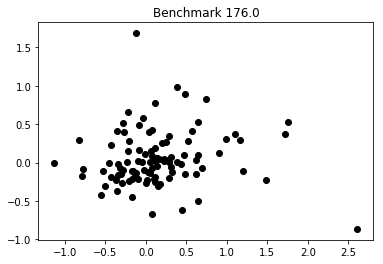

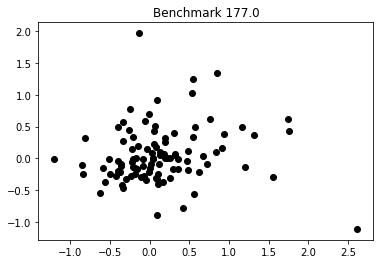

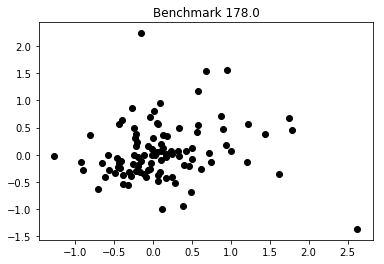

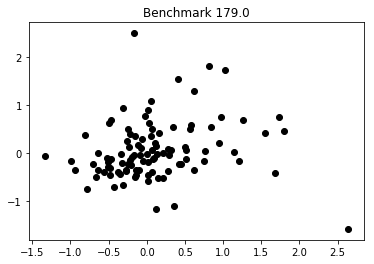

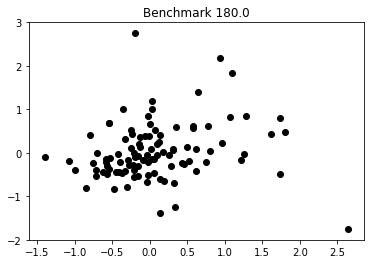

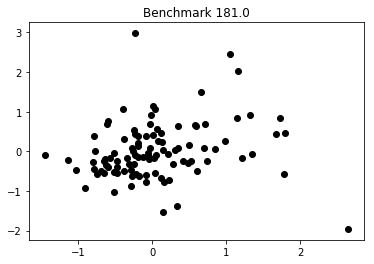

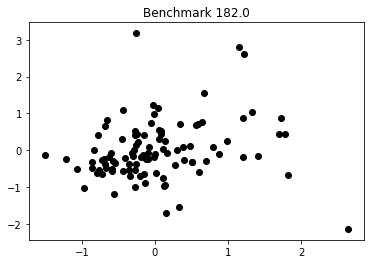

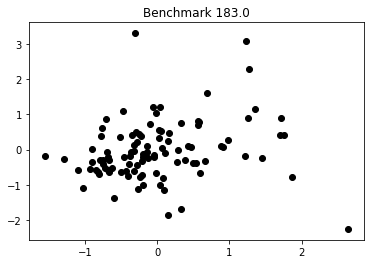

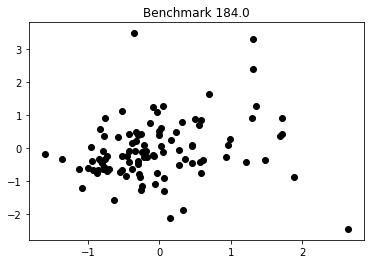

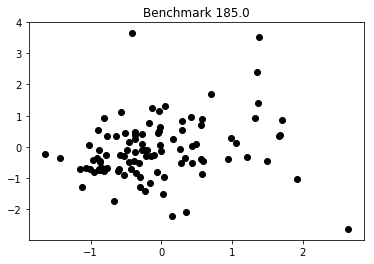

In [12]:
for i in range(0,madminer_log_ratios.shape[1]):
    plt.scatter(madminer_log_ratios[:,i], momemta_log_ratios[:,i] - momemta_log_ratios[:,expected_benchmark_idx], marker='o', color='black');
    plt.title('Benchmark {}'.format(benchmarks[i]))
    plt.show()

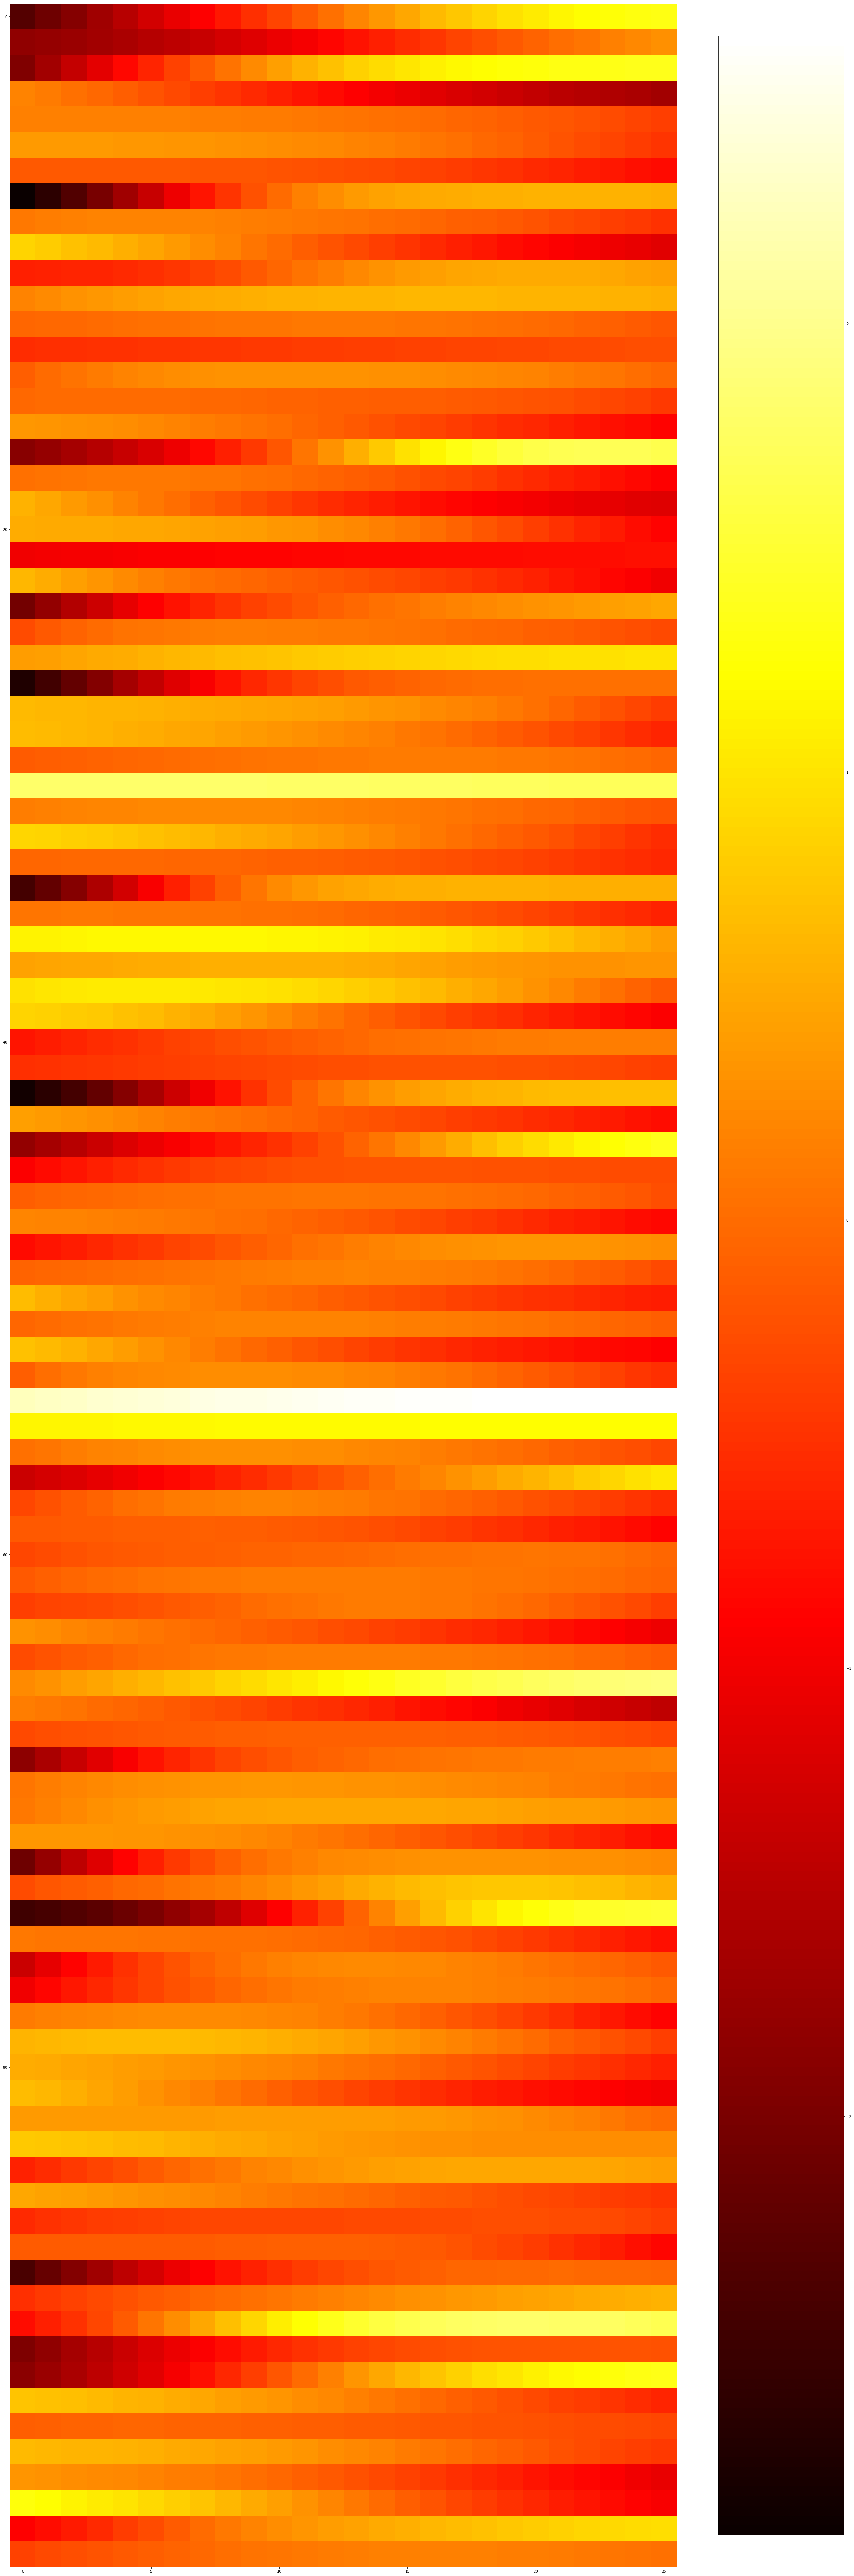

In [13]:
plt.figure(figsize=(40, 170))
plt.imshow(madminer_log_ratios, cmap='hot', interpolation='nearest')
plt.colorbar()


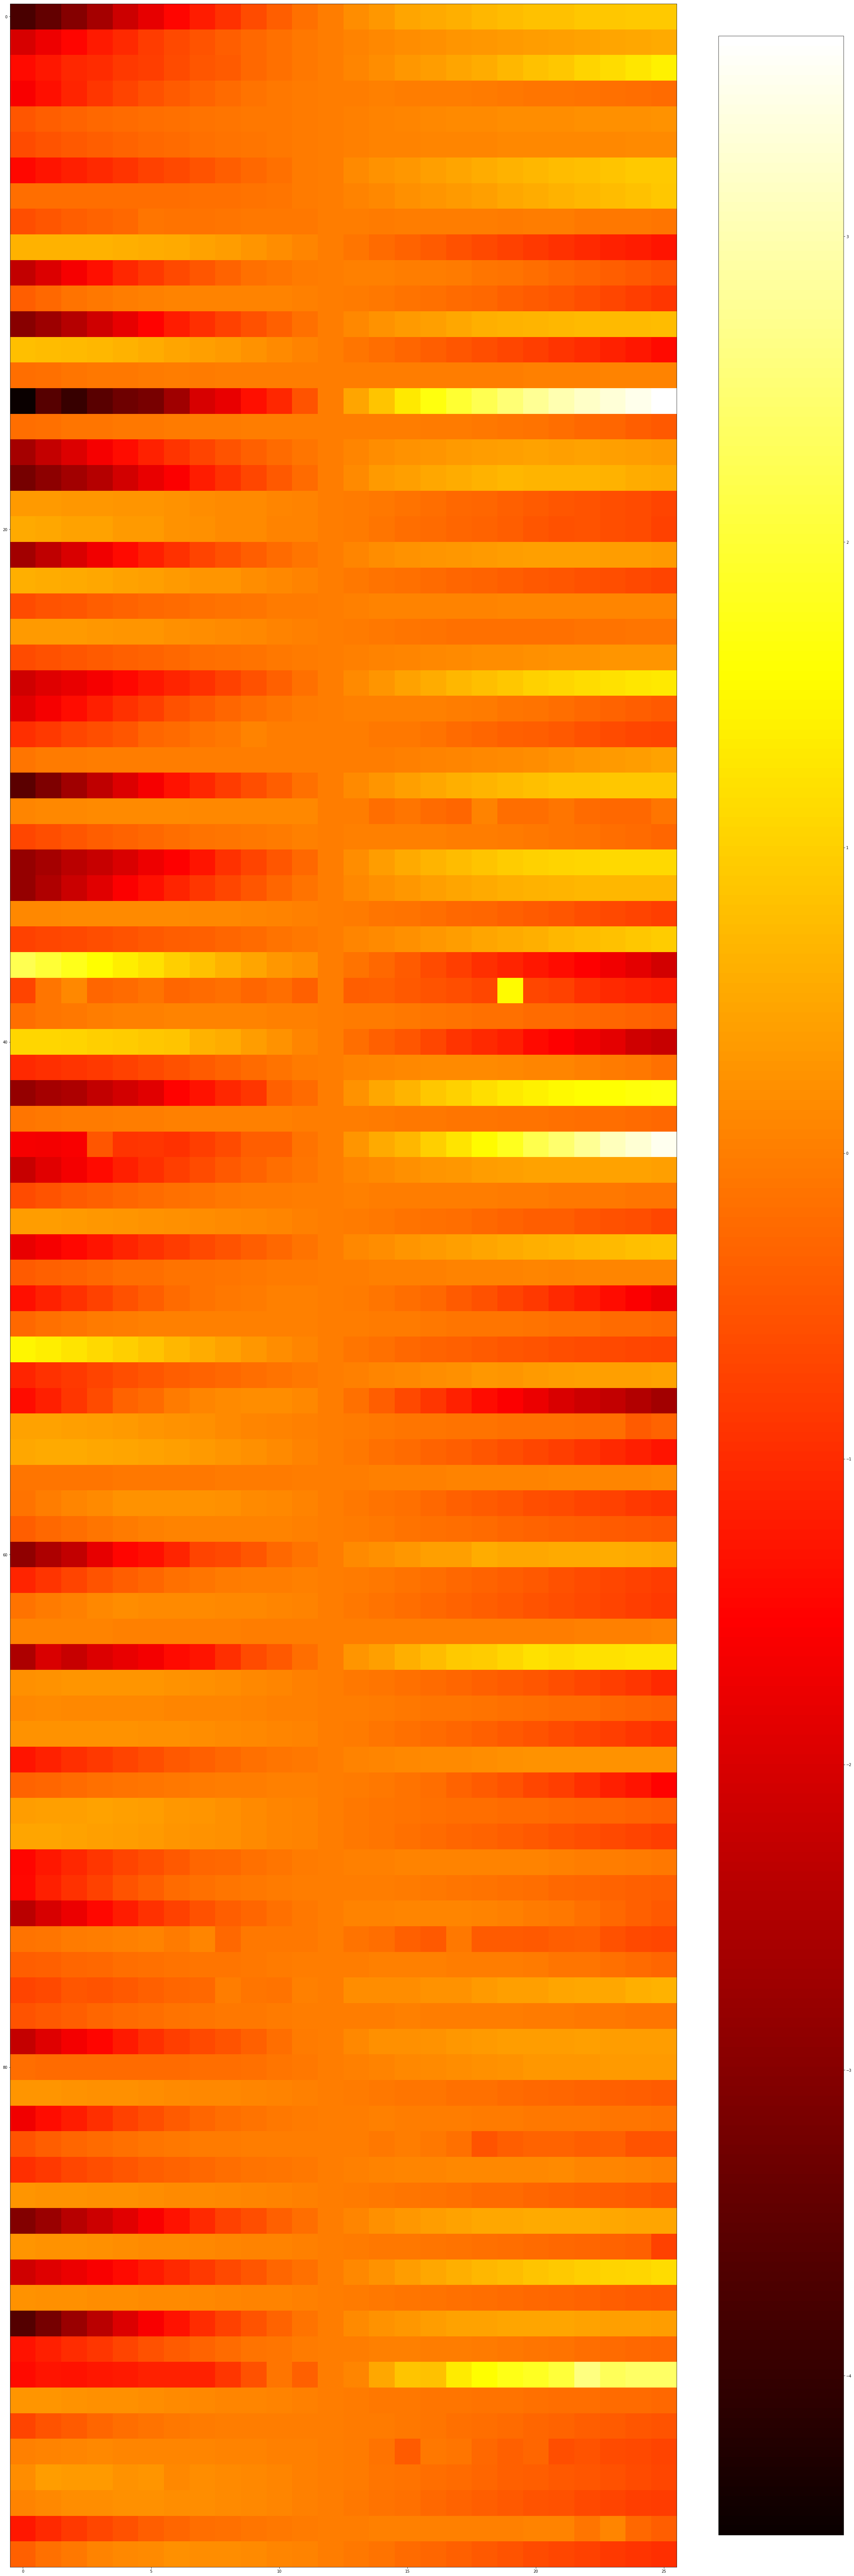

In [14]:
plt.figure(figsize=(40, 170))
plt.imshow(momemta_log_ratios, cmap='hot', interpolation='nearest')
plt.colorbar()